In [243]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn import cluster
import matplotlib.pyplot as plt
import random
import numpy as np

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(60000,28,28,1)
X_test  = X_test.reshape(10000,28,28,1)
new_X_Train = np.reshape(X_train,(-1,28*28))
new_X_Test = np.reshape(X_test,(-1,28*28))


class_list  = [[] for i in range(10)]
    
for i in range(len(X_train)):
    class_list[y_train[i]].append(new_X_Train[i])

for i in range(10):
    #random.shuffle(class_list[i])
    #sample_X = class_list[i][:100]
    #class_list[i] = sample_X
    class_list[i] = random.sample(class_list[i],100)

class_list =  np.array(class_list)


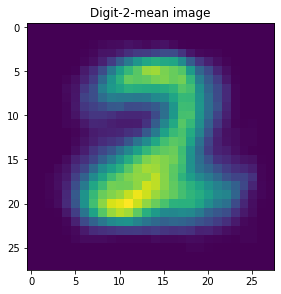

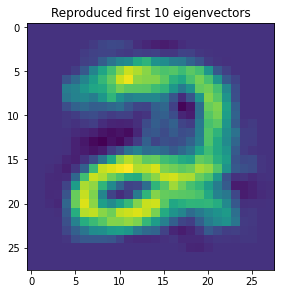

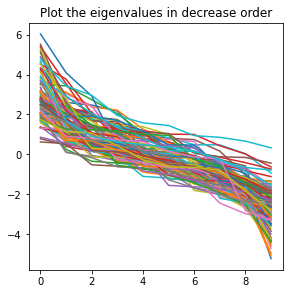

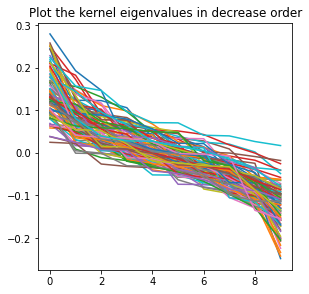

In [244]:
pca = PCA(10)
kpca = KernelPCA(kernel = 'rbf',fit_inverse_transform=True, n_components= 10)

pca_model = pca.fit_transform(class_list[2].reshape(-1,784))
kpca_model = kpca.fit_transform(class_list[2].reshape(-1,784))


plt.figure(figsize = (10,10))
plt.subplot(2,2,1) 
plt.imshow(np.array(class_list[2]).mean(axis = 0).reshape(28,28))
plt.title('Digit-2-mean image')
plt.show()

appx_pca = pca.inverse_transform(pca_model)
appx_kpca = kpca.inverse_transform(kpca_model)

plt.figure(figsize = (10,10))
plt.subplot(2,2,2)
plt.imshow(appx_pca[50].reshape(28,28))
plt.title("Reproduced first 10 eigenvectors")
plt.show()


sorted_pca_model = np.sort(pca_model,axis = 1)[:,::-1]
sorted_kpca_model = np.sort(kpca_model,axis = 1)[:,::-1]

plt.figure(figsize = (10,10))
plt.subplot(2,2,3)
for i in range(len(sorted_pca_model)):
  plt.plot(sorted_pca_model[i])
plt.title("Plot the eigenvalues in decrease order")
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(2,2,4)
for i in range(len(sorted_kpca_model)):
  plt.plot(sorted_kpca_model[i])
plt.title("Plot the kernel eigenvalues in decrease order")
plt.show()


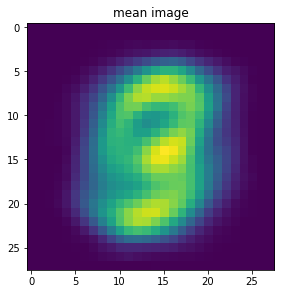

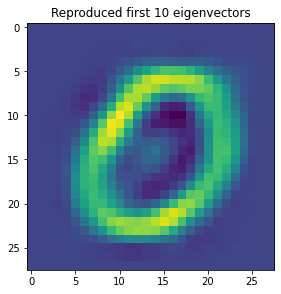

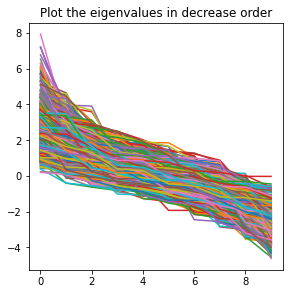

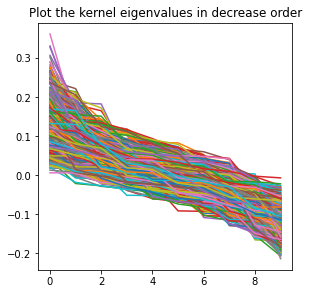

In [245]:

pca = PCA(10)
kpca = KernelPCA(kernel = 'rbf',fit_inverse_transform=True, n_components= 10)

pca_model_2 = pca.fit_transform(np.array(class_list).reshape(-1,784))
kpca_model_2 = kpca.fit_transform(np.array(class_list).reshape(-1,784))

plt.figure(figsize = (10,10))

plt.subplot(2,2,1) 
#plt.imshow(np.array(class_list).reshape(-1,784).mean(axis = 0).reshape(28,28))
plt.imshow(np.array(class_list).reshape(1000,-1).mean(axis = 0).reshape(28,28))
plt.title('mean image')
plt.show()


appx_pca_2 = pca.inverse_transform(pca_model_2)
appx_kpca_2 = kpca.inverse_transform(kpca_model_2)

plt.figure(figsize = (10,10))
plt.subplot(2,2,2)
plt.imshow(appx_pca_2[40].reshape(28,28))
plt.title("Reproduced first 10 eigenvectors")
plt.show()


sorted_pca_model_2 = np.sort(pca_model_2,axis = 1)[:,::-1]
sorted_kpca_model_2 = np.sort(kpca_model_2,axis = 1)[:,::-1]

plt.figure(figsize = (10,10))
plt.subplot(2,2,3)
for i in range(len(sorted_pca_model_2)):
  plt.plot(sorted_pca_model_2[i])
plt.title("Plot the eigenvalues in decrease order")
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(2,2,4)
for i in range(len(sorted_kpca_model_2)):
  plt.plot(sorted_kpca_model_2[i])
plt.title("Plot the kernel eigenvalues in decrease order")
plt.show()

In [288]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score


pca_model_R = pca.fit_transform(np.array(class_list).reshape(-1,784))
kpca_model_R = kpca.fit_transform(np.array(class_list).reshape(-1,784))

appx_pca_R = pca.inverse_transform(pca_model_R).reshape(-1,28*28)
appx_kpca_R = kpca.inverse_transform(kpca_model_R).reshape(-1,28*28)


kmeans = cluster.KMeans(n_clusters = 10).fit(appx_pca_R.reshape(-1,28*28))


temp_k = [] 
label_k = kmeans.predict(appx_pca_R.reshape(-1,28*28))
#print(label_k.reshape(10,-1))

for i in range(10):
    temp_k.append(np.bincount(label_k.reshape(10,-1)[i]).argmax())

new_list_k = []
for i in range(10):
    for j in range(100):
      new_list_k.append(temp_k[i])


score = rand_score(new_list_k, label_k)
score2 = mutual_info_score(new_list_k, label_k)
score3 = normalized_mutual_info_score(new_list_k, label_k)

print("rand_score: ",score)
print("mutual_info_score: ",score2)
print("normalized_mutual_info_score: ",score3)

rand_score:  0.8616816816816817
mutual_info_score:  1.0019583114374175
normalized_mutual_info_score:  0.4510803913435016


In [291]:

kmeans2 = cluster.KMeans(n_clusters = 10).fit(appx_kpca_R.reshape(-1,28*28))

temp_k2 = [] 
label_k2 = kmeans2.predict(appx_kpca_R.reshape(-1,28*28))


for i in range(10):
    temp_k2.append(np.bincount(label_k2.reshape(10,-1)[i]).argmax())


new_list_k2 = []
for i in range(10):
    for j in range(100):
      new_list_k2.append(temp_k2[i])


score = rand_score(new_list_k2, label_k2)
score2 = mutual_info_score(new_list_k2, label_k2)
score3 = normalized_mutual_info_score(new_list_k2, label_k2)

print("rand_score: ",score)
print("mutual_info_score: ",score2)
print("normalized_mutual_info_score: ",score3)

rand_score:  0.852936936936937
mutual_info_score:  1.0462976755816484
normalized_mutual_info_score:  0.48940714152925807


In [268]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.metrics import accuracy_score

centers, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,appx_pca_R)

num_predict = [[] for i in range(10)]
center_list = []

#print(centers)

for i in range(1000):
  for j in range(10):
    if label_k[i] == j: 
      num_predict[j].append(i) 

x_value = []
label = [] 

#for i in range(10):
#  center_list.append(num_predict[i][len(num_predict[i])//2])

for i in range(10):
  label.append(centers[i]//100)

for i in range(10):
  #x_value.append(appx_kpca_R[centers[i]//100][centers[i]%100])
  x_value.append(appx_pca_R[centers[i]])

#print(label)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_value,label)
prediction = knn.predict(new_X_Test)
score = classification_report(y_test,prediction)
print(score)


              precision    recall  f1-score   support

           0       0.70      0.92      0.80       980
           1       0.00      0.00      0.00      1135
           2       0.73      0.60      0.66      1032
           3       0.52      0.61      0.56      1010
           4       0.37      0.57      0.45       982
           5       0.00      0.00      0.00       892
           6       0.91      0.68      0.77       958
           7       0.81      0.62      0.70      1028
           8       0.21      0.55      0.31       974
           9       0.31      0.35      0.33      1009

    accuracy                           0.49     10000
   macro avg       0.46      0.49      0.46     10000
weighted avg       0.45      0.49      0.46     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [269]:
centers, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,appx_kpca_R)

num_predict = [[] for i in range(10)]
center_list = []

#print(centers)

for i in range(1000):
  for j in range(10):
    if label_k[i] == j: 
      num_predict[j].append(i) 

x_value = []
label = [] 

#for i in range(10):
#  center_list.append(num_predict[i][len(num_predict[i])//2])

for i in range(10):
  label.append(centers[i]//100)

for i in range(10):
  #x_value.append(appx_kpca_R[centers[i]//100][centers[i]%100])
  x_value.append(appx_kpca_R[centers[i]])


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_value,label)
prediction = knn.predict(new_X_Test)
score = classification_report(y_test,prediction)
print(score)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       980
           1       0.67      0.96      0.79      1135
           2       0.81      0.68      0.74      1032
           3       0.39      0.89      0.54      1010
           4       0.46      0.36      0.40       982
           5       0.00      0.00      0.00       892
           6       0.84      0.77      0.80       958
           7       0.69      0.67      0.68      1028
           8       0.00      0.00      0.00       974
           9       0.38      0.54      0.44      1009

    accuracy                           0.59     10000
   macro avg       0.50      0.57      0.52     10000
weighted avg       0.51      0.59      0.53     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


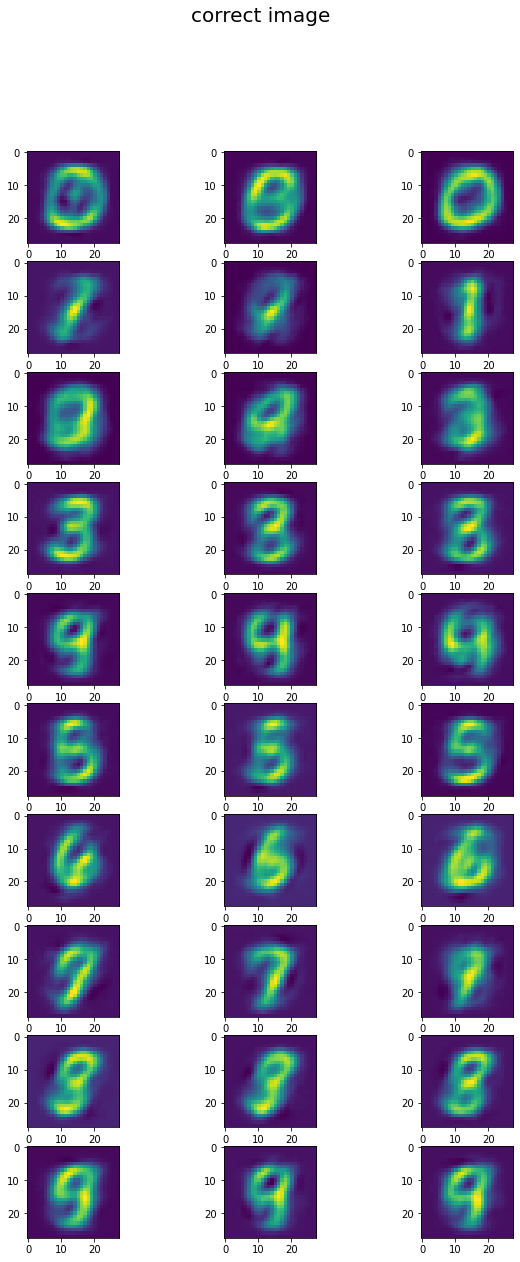

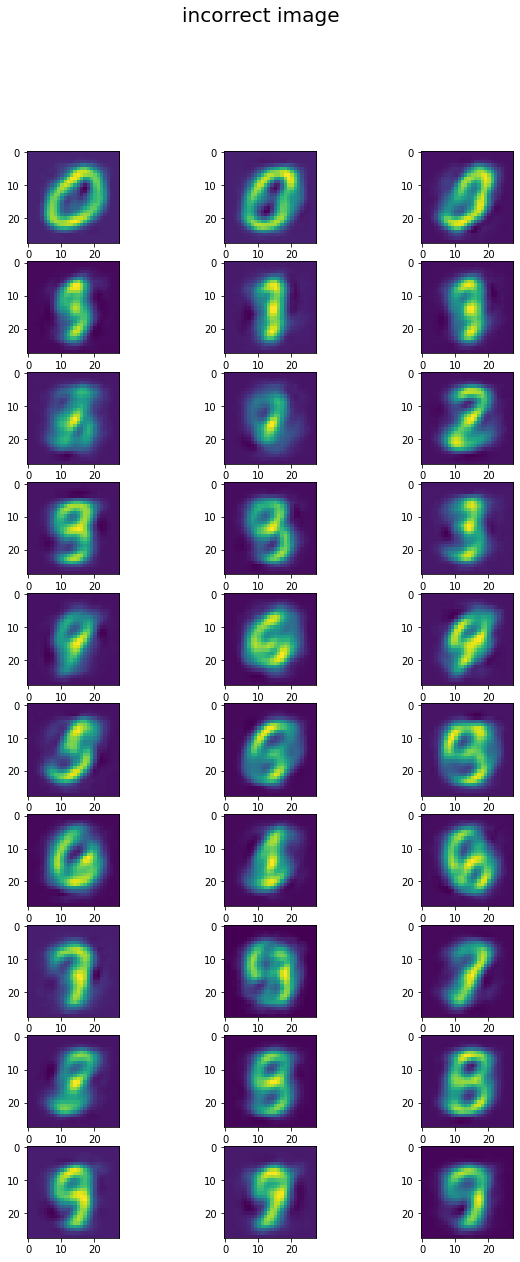

In [323]:
correct = [[]for i in range(10)]
incorrect = [[]for i in range(10)]


for i in range(10):
  c_cnt = 0
  i_cnt = 0
  
  for j in range(100):
    if np.array(label_k2).reshape(10,-1)[i][j] == np.array(new_list_k2).reshape(10,-1)[i][j] and c_cnt < 3:
      correct[i].append(appx_kpca_R[i*100+j])
      c_cnt += 1

    elif np.array(label_k2).reshape(10,-1)[i][j] != np.array(new_list_k2).reshape(10,-1)[i][j] and i_cnt < 3:
      incorrect[i].append(appx_kpca_R[i*100+j])
      i_cnt += 1
    else:
      pass


plt.figure(figsize = (10,20))
plt.suptitle("correct image",fontsize = 20)

n = 1
for i in range(10):
  for j in range(3):    
    plt.subplot(10,3,n)
    plt.imshow(correct[i][j].reshape(28,28))
    n+=1
plt.show()

plt.figure(figsize = (10,20))
plt.suptitle("incorrect image",fontsize = 20)
k = 1

for i in range(10):
  for j in range(3): 
    plt.subplot(10,3,k)
    plt.imshow(incorrect[i][j].reshape(28,28))
    k+=1
plt.show()

